<h1 align='center'>  Performance Metrics for Classification Problems </h1>

In this note book, I am going to illsutrate how we can evaluate the ML models deployed for classification task using different kind of metrics.

For illsutareting purpose I have collected the data from kaggle. I will be doing all the analysis over them only. I have attach the link for each dataset, you can also download the same.


For the implemetations of these metrics, I am using following tools and frameworks:
- Python - as a primary language
- Pandas - as an analytical engine for processing the data
- numpy - for computation using numpy arrays
- matplotlib - for plotting the figures
- sklearn - for implememting the metrics
- seaborn - for graph plotting 

Note that I will be implementing all the metrices from scratch.



## Contents

1. [Imports](#Imports)
1. [Load the Data](#Load-the-Data)
1. [Basic Exploratory Data Analysis (EDA)](#Basic-Exploratory-Data-Analysis-(EDA))
1. [Features Selection](#Feature-Selection)
1. [Features Extraction](#Feature-Extraction)
1. [Modeling](#modeling)
    1. [Train/Test SPlits](#traintest-split)
    1. [Model Selection](#model-selection)
    1. [Model Training](#model-training)
1. [Metrics For Model Evaluation](#metrics-for-model-evaluation)
    1. [Confusion matrix](#Confusion-matrix)
    1. [Accuracy](#Accuracy)
    1. [Precision](#Precision)
    1. [Recall](#Recall)
    1. [F scores](#F-scores)
    1. [Macro-averaged F scores](#Macro-averaged-F-scores)
    1. [Weighted F scores](#Weighted-F-scores)
    1. [Micro-averaged F scores](#Micro-averaged-F-scores)
    1. [Precision–recall curves](#Precision–recall-curves)
    1. [Average precision](#Average-precision)
    1. [Receiver Operating Characteristic (ROC) curve](#Receiver-Operating-Characteristic-(ROC)-curve)
    

Let's write some generic code which will be used throughout this notebook.


## Imports


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import sklearn

## Data Loader


In [11]:
#function for loading a csv file from specified path

def data_loader(path):
    
    #use pandas to load the data from path
    df = pd.read_csv(path)
    
    return df

# Classfication Problem

### Bank Customer Churn Prediction

* Problem Statement : Given the attributes of members and the associated credit score build a predictive model to forcast if a member will churn or not in future.

* About Data : The Data is from kaggle and same can be downloaded from <a href="https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction">here</a>. The label column is namesd as `Exited` and its values need to be forcasted using our models.

* Algorithms to be used : Since this is a classification problem I will be using Logistic regression, Support Vector Machine(SVM), Decision Tree, Random Forest Classifier and XgBoost Classifier and will evaluate performance for each algorithms agains many performance metrics.

* Evaluations metrics : Since this is a binary class classification problem. I will be using accuracy score, precision, recall, f1-score, log loss and AUC-ROC curve.

`Always look at your data`
## Load the data

I have downloaded the data from above link and have stored the same in my local file system. 

In [12]:
#churn df contains all the data
path= "/Users/ajitkumarsingh/Desktop/Data-Science-Interview-Questions/performance-metrics/data/Churn_Modelling.csv"
churn_df = data_loader(path)

# show first row
churn_df.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


### Basic Exploratory Data Analysis (EDA)

In [14]:
#columns name in churn df
print(f"columns name : {', '.join(churn_df.columns.tolist())}\n")

#total number of columns
print(f"total number of columns : {len(churn_df.columns)}\n")

#total count of the data
print(f"Number of rows in data : {len(churn_df)}\n")



columns name : RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited

total number of columns : 14

Number of rows in data : 10000



We have 14 attributes and 10000 rows in the churn data.

In [15]:
#number of nulls per attributes
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No Null values are present in the data for any attribute. So that is good thing like we don't have to deal with null values.

In [16]:
# number of unique values
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Note that the `RowNumber` and `CustomerId` seems like primary keys for this data. Because all the values in these columns seem unique or have no duplicates.

In [17]:
# data types
churn_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Feature Selection

For time being I am manually selecting the features. If we look at the data and problem statement that we have, the following attributes seems redundant `RowNumber`, `CustomerId`, `Surname`. We can remove these columns from our analysis because they are not providing any value add and will unnecessary complicate the analysis

In [18]:
redundant_features = ["RowNumber", "CustomerId", "Surname"]

#drop redundant features
churn_df_final = churn_df.drop(redundant_features, axis=1)

#show 1 row
churn_df_final.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


### Features Extraction

Most of machine learning algorithms expect input as some numbers and they can not deal with attributes of the non numeric type. 

We can transform those attrbutes using some techniques such as `Label Encoding` or `One Hot Encoding`.

In [19]:
#print the columns that are non-numeric
non_numeric_df = churn_df_final.select_dtypes(exclude=['int','float'])
print(f"non-numeric cols : {non_numeric_df.columns}")

non-numeric cols : Index(['Geography', 'Gender'], dtype='object')


We have two categorical columns namely `Geography` and `Gender`

In [20]:
#number of unique values
non_numeric_df.nunique()

Geography    3
Gender       2
dtype: int64

In [21]:
#value frequncy of categorical columns
non_numeric_df.value_counts()

Geography  Gender
France     Male      2753
           Female    2261
Spain      Male      1388
Germany    Male      1316
           Female    1193
Spain      Female    1089
dtype: int64

We have three ditsinct values namely `France`, `Spain` and `Germany` in `Geography` column and, two distinct values `Male` and `Female` in `Gender` column. We need to encode these variables with some numeric values then only we can feed the models.

In [22]:
#encode Gender column
#replace Male with 1 and Female with 0

gender_dict = {'Male':1,'Female':0}
churn_df_final['Gender'] = churn_df_final['Gender'].replace(gender_dict)

In [23]:
#encode Geography column using one hot encoding
#this will create some new columns (number of new columns will be equal to number of unique values in the data)
final_df_encoded = pd.get_dummies(churn_df_final,columns=['Geography'])

Now we have encoded both the categorical columns `Gender` and `Geography` using `lable encoding` and `one-hot encoding` repectively. The `final_df_encoded` now have all the attributes as numeric data type. 


In [24]:
#data types of final df
final_df_encoded.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

## Modeling

### Train/Test Split

For evaluating a model, we need some data to test it on, once training part is done. We usually split the data into two parts i.e train and test. 
On train data we update the models parameters and on test data we see how the trained model is performing. 

For spliting the data, I am using `train_test_split` function of module `sklearn.model_selection`. Also we need to segregate the label from the data.


In [25]:
from sklearn.model_selection import train_test_split

#split the data into test and train in 4:1

train_data, test_data, train_labels, test_labels = train_test_split(final_df_encoded.drop(['Exited'], axis=1), final_df_encoded['Exited'], test_size=0.2, random_state=42)

#count after split
print(f"Total count : {len(final_df_encoded)}\n")
print(f"Train Data count : {len(train_data)}\n")
print(f"Test Data count : {len(test_data)}\n")
print(f"Train Labels count : {len(train_labels)}\n")
print(f"Test Labels count : {len(test_labels)}\n")

# number of rows and labels should match
assert len(train_data)==len(train_labels) 
assert len(test_data)==len(test_labels)


Total count : 10000

Train Data count : 8000

Test Data count : 2000

Train Labels count : 8000

Test Labels count : 2000



We have stored train and test data in `train_data`, `test_data` and train and test labels in `train_labels`, `test_labels`. I will be using them during training and testing time accordingly.

### Model Selection

We have numerous models out there to solve same type of poblems. But the interesting part is like we don't know which model will be best fitting our dataset and perform well on test dataset. We need to make choice here and to do that we need to evaluate these models one by one using some performance metrics.

I will be training following models and evaluating their performance on test data

- Logistic Regressor
- Support Vector Machine(SVM) Classifier
- RandomForest Classifier
- Neighrest Neighbour Classifier

Here, I will be using `sklearn` module of `scikit-learn` library to implement the above mentioned models.

In [26]:
#import above models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [27]:
#create a list that contains one instances of each model type

model_instances = {
          'logistic_regressor':LogisticRegression(),
          'random_forest': RandomForestClassifier(), 
          'knn':KNeighborsClassifier(), 
          'svm':SVC()
          }


### Model Training

In the above step we have created instances of each model and stored in `model_instances` dict type variable. Now we need to train these instances by feeding the train distribution.

In [28]:
#train the models on training set and save the trained model for evaluation

for model_name, model in model_instances.items():

    #fit the model with train_data and train_labels
    model.fit(train_data,train_labels)
    
    #save the trained model
    model_instances[model_name] = model
    

### Metrics For Model Evaluation

Now we have trained our models and they are ready to make predictions over test dataset. To make sure the model is predicting meaningfull values not random output we need some metrics to evaluate the output. This is where performance metrics come into picture. 

Let's implement some of the most widely used evaluation metrics for classification problems from scratch.

#### Performance Metrics Implementation

##### Confusion Matrix

This a `2D` matrix of size `n*n` where n is number of distinct tables we have. It stores information about the actual lable and corresponding predicted values. 

`ex1 = `
<table>
<tr>
<th></th>
<th></th>
<th colspan=3 style="text-align:center">predicted</th>
</tr>
<tr>
<th></th>
<th></th>
<th>pos</th>
<th>neg</th>
<th>neutral</th>
</tr>
<tr>
<th rowspan=3>gold</th>
<th>pos</th>
<td>15</td>
<td>10</td>
<td>100</td>
</tr>
<tr>
<th>neg</th>
<td>10</td>
<td>15</td>
<td>10</td>
</tr>
<tr>
<th>neutral</th>
<td>10</td>
<td>100</td>
<td>1000</td>
</tr>
</table>

For classifiers that predict real values (scores, probabilities), it is important to remember that __a threshold was imposed to create these categorical predictions__. 

The position of this threshold can have a large impact on the overall assessment that uses the confusion matrix as an input. The default is to choose the class with the highest probability. This is so deeply ingrained that it is often not even mentioned. However, it might be inappropriate:

  1. We might care about the full distribution.
  1. Where the important class is very small relative to the others, any significant amount of positive probability for it might be important.

Metrics like [average precision](#Average-precision) explore this threshold as part of their evaluation procedure. 

We can use this matrix to derive various scores metrics like `accuracy score`, `precision score`, `recall score` and `f-1 score`.

Note that in the below implementation of confusion matrix

 - `CM(i, j)` => Number of instances where actual label was `i` but the predicted label was `j`

 - `CM(i, i)` => Number of instances where actual label was `i` and the predicted label was also `i`

In [121]:
"""
function to get n*n confusion matrics

Input :

    :param y_pred - a list of predicated lable from the model
    :param y_true - a list of actual labels
    :param y_uniq - unique number of labels in the data
    :return: Confusion matrix as a 2D numpy array

"""

def confusion_matrix(y_true, y_pred, classes):

    #metrics for storing TP, TN, FP and FN
    
    #note that here I am considering the labels start with 0 to n
    n_label = len(classes)

    conf_mat = np.zeros((n_label, n_label))

    for i in range(len(y_true)):

        y_true_i = y_true[i]
        y_pred_i = y_pred[i]
        
        true_indx = classes.index(y_true_i)
        pred_index =  classes.index(y_pred_i)
        
        conf_mat[true_indx][pred_index] += 1

    return conf_mat


##### Accuracy Score

This score signifies the portion of true predictions among total cases examined. A higher accuracy score suggests that the model is making more correct predictions, while a lower accuracy score indicates that the model may be making more mistakes. It is mathematically expressed as:

$$

accuracy\ score = \frac{{TP + TN}}{{TP + FP + FN + TN}}

$$
Where:

- `TP (True Positives)`  = Number of scenarios where the model's predicted labels match with the positive labels

- `FP (False Positives)` = Number of scenarios where the actual label is negative, but the model predicts it as positive(Type I Error)

- `FN (False Negatives)` = Number of scenarios where the actual label is positive, but the model predicts it as negative(Type I Error)

- `TN (True Negative)` = Number of instances where both the actual label and the model's prediction are negative

**Accuracy bounds**

[0, 1], with 0 the worst and 1 the best.

**Value encoded by accuracy**

Accuracy seems to directly encode a core value we have for classifiers – how often they are correct. In addition, the accuracy of a classifier on a test set will be negatively correlated with the [negative log (logistic, cross-entropy) loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss), which is a common loss for classifiers. In this sense, these classifiers are optimizing for accuracy.


In machine learning problems, the definition of `positive` and `negative` can vary depending on the specific problem and the context. In the `Bank Customer Churn Prediction` problem, the variable of interest is whether a customer churns (leaves) or not. in the context of this problem, `positive` refers to customers who churned, and `negative` refers to customers who did not churn. 

It's important to keep this definition in mind when interpreting performance metrics such as `accuracy`, `precision`, `recall`, and `F1-score`, as they are calculated based on the definitions of `positive` and `negative` classes in the specific problem context.

In [1]:

"""
    function to calculate accuracy score of each class using confusion matrix

    :param a 2D confusion matrix

    :return a list containing accuracy score for each class

"""


def accuracy_score(confusion_matrix):

    n_classes = confusion_matrix.shape[0]
    accuracy_score_list = []

    for i in range(n_classes):

        tp = confusion_matrix[i][i]
        fp = np.sum(confusion_matrix[i][:]) - tp
        fn = np.sum(confusion_matrix[:][i]) - tp 
        tn = np.sum(confusion_matrix) - tp - fp- fn

        accuracy_score_list.append(tp/(tp+fn+fp+tn) if tp+fn+fp+tn!=0 else 0)

    return accuracy_score_list

Cautions / Limitations 

- It's important to note that accuracy score provides an `overall evaluation` of the model's performance across all classes, but it may be deceptive in cases where the label distribution is skewed or imbalanced. In such cases, the accuracy score may be high due to the majority class dominating the predictions, while the `minority class` may be misclassified.

- To address this issue, it's recommended to use other performance metrics along with accuracy score, such as `precision`, `recall`, `F1-score`, or area under the Receiver Operating Characteristic (ROC) curve. These metrics provide insights on the model's performance at a class-level, allowing for a more comprehensive evaluation of the model's predictive accuracy, especially in `imbalanced` datasets.





#### Related to accuracy

* Accuracy is inversely proportional to the [negative log (logistic, cross-entropy) loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss) that many classifiers optimize:

$$
-\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{i,k} \log(p_{i,k})
$$

* Accuracy can be related in a similar way to [KL divergence](https://en.wikipedia.org/wiki/Kullback–Leibler_divergence):    
$$
D_{\text{KL}}(y \parallel p) = 
    \sum _{k=1}^{K} y_{k} \log\left(\frac {y_{k}}{p_{k}}\right)
$$
  Where $y$ is a "one-hot vector" (a classification label) with $1$ at position $k$, this reduces to 
  $$
  \log\left(\frac{1}{p_{k}}\right) = -\log(p_{k})
  $$
  Thus, KL-divergence is an analogue of accuracy for soft labels.

##### Precision Score

It is the portion of true positive class among predicted postive classes. It is preferable choice when you want to be very sure of your predictions.

It can be expressed as :

$$

precision\ score = \frac{{TP }}{{TP + FP}}

 $$ 

 [Precision](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) is the sum of the correct predictions divided by the sum of all guesses. This is a per-class notion; in our confusion matrices, it's the diagonal values divided by the column sums:

**Precision bounds**

[0, 1], with 0 the worst and 1 the best. (Caveat: undefined values resulting from dividing by 0 need to be mapped to 0.)

**Value encoded by precision**

Precision encodes a _conservative_ value in penalizing incorrect guesses.




In [201]:
"""
    function to calculate precision score of each class using confusion matrix

    :param a 2D confusion matrix

    :return a list containing precision for each class

"""


def precision_score(confusion_matrix):

    n_classes = confusion_matrix.shape[0]
    precision_score_list = []
    
    for i in range(n_classes):

        tp = confusion_matrix[i][i]
        fp = np.sum(confusion_matrix, axis=0)[i] - tp
        precision_score_list.append(tp/(tp+fp) if tp+fp!=0 else 0)

    return precision_score_list

     

##### Weaknesses of precision

Precision's dangerous edge case is that one can achieve very high precision for a category by rarely guessing it. Consider, for example, the following classifier's flawless predictions for __pos__ and __neg__. These predictions are at the expense of __neutral__, but that is such a big class that it hardly matters to the precision for that class either.

##### Recall Score

[Recall](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) is the sum of the correct predictions divided by the sum of all true instances. This is a per-class notion; in our confusion matrices, it's the diagonal values divided by the row sums. Recall is sometimes called the "true positive rate".

It measures the proportion of actual positive cases that are correctly predicted by the model.

Recall trades off against precision. 

It is calculated as:


$$

recall\ score = \frac{{TP }}{{TP + FN}}

$$ 




A higher recall score indicates that the model is effectively capturing a larger proportion of the actual positive cases. It is a suitable metric when the goal is to minimize false negatives, i.e., correctly identifying as many positive cases as possible.

**Recall bounds**

[0, 1], with 0 the worst and 1 the best.

**Value encoded by recall**

Recall encodes a _permissive_ value in penalizing only missed true cases.



In [202]:
"""
    function to calculate recall score of each class using confusion matrix

    :param a 2D confusion matrix

    :return a list containing recall for each class

"""


def recall_score(confusion_matrix):

    n_classes = confusion_matrix.shape[0]
    recall_score_list = []

    for i in range(n_classes):

        tp = confusion_matrix[i][i]
        fn = np.sum(confusion_matrix, axis=1)[i] - tp

        recall_score_list.append(tp/(tp+fn) if tp+fn!=0 else 0)

    return recall_score_list


##### Weaknesses of recall

Recall's dangerous edge case is that one can achieve very high recall for a category by always guessing it. This could mean a lot of incorrect guesses, but recall sees only the correct ones. 

##### F Scores
[F scores](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html#sklearn.metrics.fbeta_score) combine precision and recall via their harmonic mean, with a value $\beta$ that can be used to emphasize one or the other. Like precision and recall, this is a per-category notion.

It captures tradeoff between precision and recall.


$$
(\beta^{2}+1) \cdot \frac{\textbf{precision} \cdot
          \textbf{recall}}{(\beta^{2} \cdot \textbf{precision}) +
          \textbf{recall}}
$$

Where $\beta=1$, we have F1:

$$

F-1\ score = \frac{{2*Precision * Recall}}{{Precision + Recall}}

$$

The `F1 score` is a suitable choice when both `precision` and `recall` are equally important, and we want to balance between the two. It is commonly used in classification problems where achieving a good balance between `precision` and `recall` is desired.

**Bounds of F scores**

[0, 1], with 0 the worst and 1 the best, and guaranteed to be between precision and recall.

**Value encoded by F scores**

The $F_{\beta}$ score for a class $K$ is an attempt to summarize how well the classifier's $K$ predictions align with the true instances of $K$. Alignment brings in both missed cases and incorrect predictions. Intuitively, precision and recall keep each other in check in the calculation. This idea runs through almost all robust classification metrics.


In [2]:
"""
    function to calculate f-1 score of each class using confusion matrix

    :param a 2D confusion matrix

    :return a list containing f-1 score for each class

"""


def f1_score(confusion_matrix):

    #get precision score for each class
    precision_score_list = precision_score(confusion_matrix)

    #get recall score for each class
    recall_score_list = recall_score(confusion_matrix)

    f1_score_list = [2*p*r/(p+r) if p+r != 0 else 0 for p, r in zip(precision_score_list,recall_score_list)]

    return f1_score_list


**Weaknesses of F scores**

* There is no normalization for the size of the dataset within $K$ or outside of it.

* For a given category $K$, the $F_{\beta}$ score for $K$ ignores  all the values that are off the row and column for $K$, which might be the majority of the data. This means that the individual scores for a category can be very misleading about the overall performance of the system. 

##### Macro-averaged F scores

The [macro-averaged $F_{\beta}$ score](http://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification) (macro $F_{\beta}$) is the mean of the $F_{\beta}$ score for each category:

In [7]:
def macro_f_score(cm, beta):
    return f_score(cm, beta).mean(skipna=False)

**Bounds of macro-averaged F scores**

[0, 1], with 0 the worst and 1 the best, and guaranteed to be between precision and recall.

**Value encoded by macro-averaged F scores**

Macro $F_{\beta}$ scores inherit the values of $F_{\beta}$ scores, and they additionally say that we care about all the classes equally regardless of their size. 

**Weaknesses of macro-averaged F scores**

In NLP, we typically care about modeling all of the classes well, so macro-$F_{\beta}$ scores often seem appropriate. However, this is also the source of their primary weaknesses:

* If a model is doing really well on a small class $K$, its high macro $F_{\beta}$ score might mask the fact that it mostly makes incorrect predictions outside of $K$. So $F_{\beta}$ scoring will make this kind of classifier look better than it is.

* Conversely, if a model does well on a very large class, its overall performance might be high even if it stumbles on some small classes. So $F_{\beta}$ scoring will make this kind of classifier look worse than it is, as measured by sheer number of good predictions.


##### Weighted F scores

[Weighted $F_{\beta}$ scores](http://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification) average the per-category F$_{\beta}$ scores, but it's a weighted average based on the size of the classes in the observed/gold data:

In [8]:
def weighted_f_score(cm, beta):
    scores = f_score(cm, beta=beta).values
    weights = cm.sum(axis=1)
    return np.average(scores, weights=weights)

In [9]:
weighted_f_score(ex3, beta=1.0)

NameError: name 'ex3' is not defined

**Bounds of weighted F scores**

[0, 1], with 0 the worst and 1 the best, but without a guarantee that it will be between precision and recall.

**Value encoded by weighted F scores**

Weighted $F_{\beta}$ scores inherit the values of $F_{\beta}$ scores, and they additionally say that we want to weight the summary by the number of actual and predicted examples in each class. This will probably correspond well with how the classifier will perform, on a per example basis, on data with the same class distribution as the training data.

**Weaknesses of weighted F scores**

Large classes will dominate these calculations. Just like macro-averaging, this can make a classifier look artificially good or bad, depending on where its errors tend to occur.

### Micro-averaged F scores

[Micro-averaged $F_{\beta}$ scores](http://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification) (micro $F_{\beta}$ scores) add up the 2 $\times$ 2 confusion matrices for each category versus the rest, and then they calculate the $F_{\beta}$ scores, with the convention being that the positive class's $F_{\beta}$ score is reported. 

This function creates the 2 $\times$ 2 matrix for a category `cat` in a confusion matrix `cm`:

In [10]:
def cat_versus_rest(cm, cat):
    yes = cm.loc[cat, cat]
    yes_no = cm.loc[cat].sum() - yes
    no_yes = cm[cat].sum() - yes
    no = cm.values.sum() - yes - yes_no - no_yes
    return pd.DataFrame(
        [[yes,    yes_no],
         [no_yes,    no]],
        columns=['yes', 'no'],
        index=['yes', 'no'])

In [11]:
display(ex1)
display(cat_versus_rest(ex1, 'pos'))
display(cat_versus_rest(ex1, 'neg'))
display(cat_versus_rest(ex1, 'neutral'))

NameError: name 'ex1' is not defined

In [12]:
sum([cat_versus_rest(ex1, cat) for cat in ex1.index])

NameError: name 'ex1' is not defined

For the micro $F_{\beta}$ score, we just add up these per-category confusion matrices and calculate the $F_{\beta}$ score:

In [13]:
def micro_f_score(cm, beta):
    c = sum([cat_versus_rest(cm, cat) for cat in cm.index])
    return f_score(c, beta=beta).loc['yes']

In [14]:
micro_f_score(ex1, beta=1.0)

NameError: name 'ex1' is not defined

**Bounds of micro-averaged F scores**

[0, 1], with 0 the worst and 1 the best, and guaranteed to be between precision and recall.

**Value encoded by micro-averaged F scores**

* Micro $F_{\beta}$ scores inherit the values of weighted $F_{\beta}$ scores. (The resulting scores tend to be very similar.)

* For two-class problems, this has an intuitive interpretation in which precision and recall are defined in terms of correct and incorrect guesses ignoring the class. 

**Weaknesses of micro-averaged F scores**

The weaknesses too are the same as those of weighted F$_{\beta}$ scores, with the additional drawback that we actually get two potentially very different values, for the positive and negative classes, and we have to choose one to meet our goal of having a single summary number. (See the `'yes'` in the final line of `micro_f_score`.)



##### Precision–recall curves

Confusion matrices hide a threshold for turning probabilities/scores into predicted labels. With precision–recall curves, we finally address this.

A precision–recall curve is a method for summarizing the relationship between precision and recall for a binary classifier. 

The basis for this calculation is not the confusion matrix, but rather the raw scores or probabilities returned by the classifier. Normally, we use 0.5 as the threshold for saying that a prediction is positive. However, each distinct real value in the set of predictions is a potential threshold. The precision–recall curve explores this space.


Here's a basic implementation; [the sklearn version](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) is more flexible and so recommended for real experimental frameworks.

In [3]:
def precision_recall_curve(y, probs):
    """`y` is a list of labels, and `probs` is a list of predicted
    probabilities or predicted scores -- likely a column of the
    output of `predict_proba` using an `sklearn` classifier.
    """
    thresholds = sorted(set(probs))
    data = []
    for t in thresholds:
        # Use `t` to create labels:
        pred = [1 if p >= t else 0 for p in probs]
        # Precision/recall analysis as usual, focused on
        # the positive class:
        cm = pd.DataFrame(confusion_matrix(y, pred))
        prec = precision_score(cm)[1]
        rec = recall_score(cm)[1]
        data.append((t, prec, rec))
    # For intuitive graphs, always include this end-point:
    data.append((None, 1, 0))
    return pd.DataFrame(
        data, columns=['threshold', 'precision', 'recall'])

I'll illustrate with a hypothetical binary classification problem involving balanced classes:

In [4]:
y = np.random.choice((0, 1), size=1000, p=(0.5, 0.5))

NameError: name 'np' is not defined

Suppose our classifier is generally able to distinguish the two classes, but it never predicts a value above 0.4, so our usual methods of thresholding at 0.5 would make the classifier look very bad:

In [ ]:
y_pred = [np.random.uniform(0.0, 0.3) if x == 0 else np.random.uniform(0.1, 0.4)
         for x in y]

The precision–recall curve can help us identify the optimal threshold given whatever our real-world goals happen to be:

In [ ]:
prc = precision_recall_curve(y, y_pred)

In [ ]:
def plot_precision_recall_curve(prc):
    ax1 = prc.plot.scatter(x='recall', y='precision', legend=False)
    ax1.set_xlim([0, 1])
    ax1.set_ylim([0, 1.1])
    ax1.set_ylabel("precision")
    ax2 = ax1.twiny()
    ax2.set_xticklabels(prc['threshold'].values[::100].round(3))
    _ = ax2.set_xlabel("threshold")

In [ ]:
plot_precision_recall_curve(prc)

**Value encoded by precision–recall curves**

With precision–recall curves, we get a generalized perspective on F1 scores (and we could weight precision and recall differently to achieve the effects of `beta` for F scores more generally). These curves can be used, not only to assess a system, but also to identify an optimal decision boundary given external goals. 

**Weaknesses of precision–recall curves**

* Most implementations are limited to binary problems. The basic concepts are defined for multi-class problems, but it's very difficult to understand the resulting hyperplanes.

* There is no single statistic that does justice to the full curve, so this metric isn't useful on its own for guiding development and optimization. Indeed, opening up the decision threshold in this way really creates another hyperparameter that one has to worry about!

##### Average precision

Average precision is a method for summarizing the precision–recall curve. It does this by calculating the average precision weighted by the change in recall from step to step along the curve. 

Here is the calculation in terms of the data structures returned by `precision_recall_curve` above, in which (as in sklearn) the largest recall value is first:

$$\textbf{average-precision}(r, p) = \sum_{i=1}^{n} (r_{i} - r_{i+1})p_{i}$$

where $n$ is the increasing sequence of thresholds and the precision and recall vectors $p$ and $r$ are of length $n+1$. (We insert a final pair of values $p=1$ and $r=0$ in the precision–recall curve calculation, with no threshold for that point.)

In [5]:
def average_precision(p, r):
    total = 0.0
    for i in range(len(p)-1):
        total += (r[i] - r[i+1]) * p[i]
    return total

In [6]:
plot_precision_recall_curve(prc)

NameError: name 'plot_precision_recall_curve' is not defined

**Bounds of average precision**

[0, 1], with 0 the worst and 1 the best.

**Value encoded by average precision**

This measure is very similar to the F1 score, in that it is seeking to balance precision and recall. Whereas the F1 score does this with the harmonic mean, average precision does it by making precision a function of recall.

**Weaknesses of average precision**

* An important weakness of this metric is cultural: it is often hard to tell whether a paper is reporting average precision or some interpolated variant thereof. The interpolated versions are meaningfully different and will tend to inflate scores. In any case, they are not comparable to the calculation defined above and implemented in `sklearn` as `sklearn.metrics.average_precision_score`.

* Unlike for precision–recall curves, we aren't strictly speaking limited to binary classification here. Since we aren't trying to visualize anything, we can do these calculations for multi-class problems. However, then we have to decide on how the precision and recall values will be combined for each step: macro-averaged, weighted, or micro-averaged, just as with F$_{\beta}$ scores. This introduces another meaningful design choice.

##### Log Loss or Binary Cross Entropy

Log Loss, also known as Binary Cross Entropy, is a common metric used to evaluate the performance of a model when the output is in the form of `predicted probabilities`. It is calculated as the negative average of the sum of the logarithm of the predicted probabilities for the true labels and the logarithm of the complement of the predicted probabilities for the false labels.

It can be expressed as:
$$
Log Loss = -\frac{1}{N}\sum_{i=1}^{N} \left[ y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right]
$$

The negative sign in the Log Loss formula is used to ensure that the overall value of the metric is minimized during optimization. In other words, it is used to represent the loss or cost associated with misclassification.


In [282]:
"""
    function to calculate log loss of a model's prediction in case of binary class classification

    :param a y_true - actual label and y_pred - predicted probabilties

    :return log loss a singular value

"""

def log_loss(y_true, y_pred_prob):

    #apply expression for calculating log loss

    log_loss = np.average([-(y_ti*np.log(y_pi)+(1-y_ti)*np.log(1-y_pi)) for y_ti, y_pi in zip(y_true, y_pred_prob)])

    return log_loss



##### Area Under Receiver Operating Characterstics Curve (AUROC)

The Receiver Operating Characteristic (ROC) curve for a class $k$ depicts recall the __false positive rate__ (FPR) for $k$ as a function of the __recall__ for $k$. For instance, suppose we focus on $k$ as the positive class $A$:

$$
\begin{array}{r r r}
\hline
 & A & B \\
\hline
A & \text{TP}_{A} & \text{FN}_{A}\\
B & \text{FP}_{A} & \text{TN}_{A}\\
\hline
\end{array}
$$

The false positive rate is 

$$
\textbf{fpr}(A) = \frac{\text{FP}_{A}}{\text{FP}_{A} + \text{TN}_{A}}
$$

which is equivalent to 1 minus the recall for $B$ class. 
This Indicates how well probabilities from positive class are seperated from negative class.

ROC summarizes models performance by evaluating the trade off TPR(sensitivity) and FPR(1-specificity).


The ROC curve is a probability curve, and for an ideal model, the area under the ROC curve would be 1, indicating perfect classification performance. The interpretation of AUROC is as follows:

- AUC is `0.x`, It means there is `10x%` chance of fair classification.

It's important to note that the AUROC is commonly used for binary class classification problems. For multiclass classification, there would be `N` number of AUROC curves using the `one vs rest` methodology, where each class is compared against the rest of the classes separately.



**Bounds of ROC**

* For individual ROC calculations of recall divided fpr: [0, $\infty$), with larger better.
* For ROC AUC: [0, 1], with 1 the best.

**Weaknesses of ROC**

Recall that, for two classes $A$ and $B$, 

$$
\begin{array}{r r r}
\hline
 & A & B \\
\hline
A & \text{TP}_{A} & \text{FN}_{A}\\
B & \text{FP}_{A} & \text{TN}_{B}\\
\hline
\end{array}
$$

we can express ROC as comparing $\textbf{recall}(A)$ with $1.0 - \textbf{recall}(B)$.

This reveals a point of contrast with scores based in precision and recall: the entire table is used, whereas precision and recall for a class $k$ ignore the $\text{TN}_{k}$ values. Thus, whereas precision and recall for a class $k$ will be insensitive to changes in $\text{TN}_{k}$, ROC will be affected by such changes. The following individual ROC calculations help to bring this out:

$$
\begin{array}{r r r r r}
\hline
 & A & B & \textbf{F1} & \textbf{ROC}\\
\hline
A & 15 & 10 & 0.21 & 0.90 \\
B & 100 & {\color{blue}{50}} & 0.48 & 0.83 \\
\hline
\end{array}
\qquad
\begin{array}{r r r r r}
\hline
 & A & B & \textbf{F1} & \textbf{ROC} \\
\hline
A & 15 & 10 & 0.21 & 3.6 \\
B & 100 & {\color{blue}{500}} & 0.90 & 2.08  \\
\hline
\end{array}
$$

One might worry that the model on the right isn't better at identifying class $A$, even though its ROC value for $A$ is larger.

Calculate False positive and True positive rates

In [274]:
"""
    Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for different thresholds in case of binary class problems

    Args:
        y_true (array-like): Actual labels (ground truth).
        y_pred_prob (array-like): Predicted probabilities for positive class.

    Returns:
        tuple: A tuple containing two lists - TPR (True Positive Rate) and FPR (False Positive Rate)
              for each threshold.
"""

def get_fpr_tpr(y_true, y_pred_prob):

    #stores tpr and fpr at different thresholds
    tprs = []
    fprs = []
    
    #sort y_pred_prob in decreasing order
    # First sort indices in descending order
    sort_indices = np.argsort(y_pred_prob)[::-1]  
    # Sort y_score array
    y_score_sorted = y_pred_prob[sort_indices]  
    # Rearrange y_true array to match sorted order of y_score
    y_true_sorted = y_true[sort_indices]  

    #derive classification threshold from y_pred_prob
    thresholds = np.sort(list(set(y_pred_prob)))[::-1]
    
    for threshold in thresholds:
        
        y_pred = [y_p > threshold for y_p in y_score_sorted]

        conf_mat = confusion_matrix(y_true_sorted, y_pred, list(set(y_true_sorted)))
        
        #using confusion matrix we can define tp, fp and hence tpr and fpr
        tp = conf_mat[1][1]
        fp = conf_mat[0][1]
        fn = conf_mat[1][0]
        tn = conf_mat[0][0]

        tpr = tp/(tp+fn) if tp+fn != 0 else 1
        fpr = fp/(fp+tn) if fp+tn != 0 else 1

        #append the above values
        tprs.append(tpr)
        fprs.append(fpr)
    
    return fprs, tprs
    

Find Area Under Curve (AUC)

In [264]:
"""
    Find Area Under ROC Curve

    Args:
        tprs (list of tpr at different thresholds)
        fprs (list of fpr at different thresholds)

    Returns:
        a number - area under roc curve
"""

def auc_roc(fpr, tpr):
    
    #use trapezoidal rule to find area
    auc = np.trapz(fpr, tpr)
    
    return auc


Plot ROC Curve



In [265]:
"""
    Plot ROC curve 

    Args:
        tprs (list): true positive rates(recall/sensitivity)
        fprs (list): false positive rates(1-specificity)

    Returns:
        None
"""

def plot_roc(fpr, tpr, model_name="Logistic Regressor"):
    
    #get area under the curve
    area_under_roc = auc_roc(fpr, tpr)
    #define fig size
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area_under_roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    #set x and y limit
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    #put headings
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve for ' + model_name)
    plt.legend(loc="lower right")

    plt.show()




### Model Prediction

Now we have defined the performance metrics, we can use them to evaluate the model predctions.

From Train/Test Split Section we have :

- `train_data`, `test_data`, `train_labels` and `test_labels` we can use them for models performance evaluations.

From Model Training section we have : 

- trained instances of `SVM classifier`, `Logestic Regressor`, `Random Forest Classifier` and `Nearest Neighbour Classifier` in `model_instances` dictionary. We need to feed the test data to these instances  to get the predictions

In [246]:
"""
    get predictions from test instances

    Args:
        trained_model () : trained instance
        test_data (pandas dataframe) : testing data without label

    Returns:
        list of predictions against each row in test data
"""


def make_predictions(trained_model, test_data):

    return trained_model.predict(test_data)

    

In [247]:
#store predictions against each model

y_pred_per_model = {}

for model_name, model_instance in model_instances.items():
    
    y_pred_per_model[model_name] = make_predictions(model_instance, test_data) 


We have stored model name and it's predictions over test data in `y_pred_per_model` and we have also `test_labels` which is like ground truths.

### Model Evaluation

This is like the last step we need to perform to compare which classification algorithm is performating relatively better over test distribution. In the above sctions, We are done with implementaion of performance metrics now we can use to evaluate the trained models.

#### Plotting Confusion Matrix

For each model, let's plot the confusion matrix separately.

In [286]:

def plot_cm(conf_matrix, model_name, labels, ax):

    # visualize the confusion matrix
    ax.imshow(conf_matrix, cmap='Greens')
    ax.set_title('Confusion Matrix for '+model_name)
    ax.set_xticks(np.arange(2))
    ax.set_yticks(np.arange(2))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
    
    #make sure score are align properly in graph
    for i in range(2):
        for j in range(2):
            ax.text(j, i, int(conf_matrix[i, j]), ha='center', va='center', color='red')

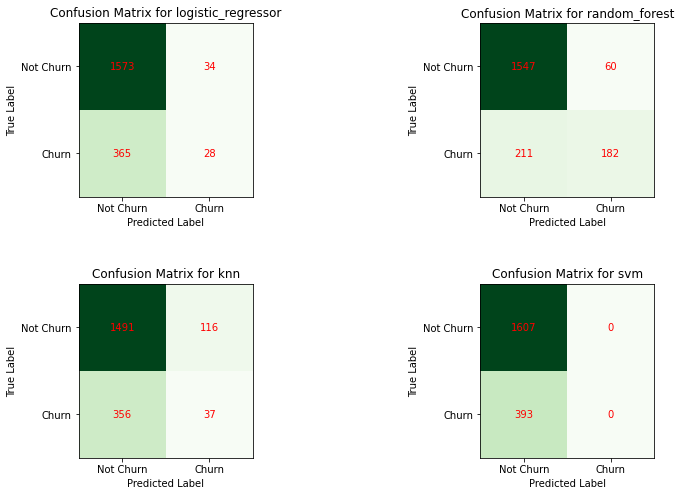

In [287]:
#plot 2 graphs per row
# Calculate number of rows and columns for subplots
num_models = len(y_pred_per_model)
num_rows = num_models // 2 + num_models % 2
num_cols = 2

# Create subplots with num_rows rows and num_cols columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

# Iterate over models and plot confusion matrix
for i, (model_name, y_pred) in enumerate(y_pred_per_model.items()):
    row_idx = i // num_cols
    col_idx = i % num_cols
    cm = confusion_matrix(list(test_labels), y_pred, list(set(test_labels)))
    plot_cm(cm, model_name, ["Not Churn", "Churn"], axes[row_idx, col_idx])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

Above plots are showing confusion matrix for different models. Using these plots we can deduce various scores against each model and then we can make comparision as well. 

**Note** that in this notebook, I am illustrating how can we implement several performance metrics for classification problems and how can we interpret the results. So, we are not concerned by how well a model is performing and about hyperparameters tuning.

#### Classification Report

For each model, we can display a report kind of structure which consists of `class` and its `accuracy score`
, `precision score`, `recall score`, `F-1 score` and `support`.

In [248]:

#iterate over y_pred_per_model dict and each model let's build this classification report

y_true = np.array(test_labels)
labels_encoded = {0:'Not Churn', 1:'Churn'}

for model_name, y_pred in y_pred_per_model.items():

    print(f"Classification Report For {model_name} \n")

    cm = confusion_matrix(list(test_labels), y_pred, list(set(test_labels)))

    #get number of distinct labels
    n_labels = cm.shape[0]

    #using confusion matrix get following score
    precision = precision_score(cm)
    recall = recall_score(cm)
    accuracy = accuracy_score(cm)
    f_1 = f1_score(cm)
    support = np.sum(cm, axis=1)
    
    #print the values
    print("{:<20} {:<15} {:<15} {:<15} {:<15} {:<15}".format("Class", "Accuracy", "Precision", "Recall", "F1-Score", "Support"))

    #loop over each label and print the corresponding score
    for label in range(n_labels):
        print("{:<20} {:<15.4f} {:<15.4f} {:<15.4f} {:<15.4f} {:<15}".format(labels_encoded[label], accuracy[label], precision[label], recall[label], f_1[label], support[label]))
    
    print("\n")




Classification Report For logistic_regressor 

Class                Accuracy        Precision       Recall          F1-Score        Support        
Not Churn            0.7865          0.8117          0.9788          0.8874          1607.0         
Churn                0.0140          0.4516          0.0712          0.1231          393.0          


Classification Report For random_forest 

Class                Accuracy        Precision       Recall          F1-Score        Support        
Not Churn            0.7735          0.8800          0.9627          0.9195          1607.0         
Churn                0.0910          0.7521          0.4631          0.5732          393.0          


Classification Report For knn 

Class                Accuracy        Precision       Recall          F1-Score        Support        
Not Churn            0.7455          0.8073          0.9278          0.8633          1607.0         
Churn                0.0185          0.2418          0.0941        

Given that the dataset has imbalanced distributions with `393` positive classes and `1607` negative classes, relying solely on accuracy score to evaluate model performance is inadequate. Other metrics, such as the `F-1` score, which considers both precision and recall, are more appropriate for performance measurement.

From the Classification Report, it is evident that the Random Forest algorithm outperforms the other algorithms in terms of `F-1` score. 

**Note** that the choice of metrics depends on the specific problem and its business impact. What may be the best metric for one problem may not necessarily be suitable for another. Therefore, careful consideration of the problem and its implications is crucial in selecting the appropriate evaluation metric for the given scenario.


#### Plotting ROC Curve

As we discussed earlier ROC curve is a probabilistic curve and it can be used when you have a predictive model which ouput probabilities against each label instead of the value of actual label.

Among selected algorithms we have right now `Logistic Regressor` can be used to produce associated probabilities against each class. In `sklearn` we have `predict_proba` method we can use it to get assigned probabilities to each label.

For getting `True Positive Rate(TPR)` and `False Positive Rate(FPR)` we have already defined `get_tpr_fpr` in the above section and, for plotting the ROC curve we have defined `plot_roc` function.

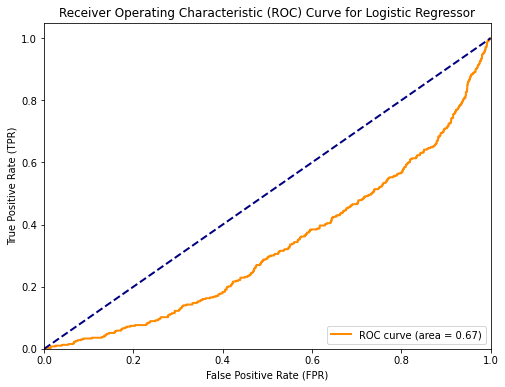

In [267]:
#get trained insatnce of LR

lr = model_instances['logistic_regressor']

#use predict proba to get assigned probabilities over test data
y_pred_prob = lr.predict_proba(test_data)
y_true = np.array(test_labels)

#get fpr and tpr using y_pred_prob and y_true 
fpr, tpr = get_fpr_tpr(y_true, y_pred_prob[:, 0]) # for only positive class


#plot the roc 
plot_roc(fpr, tpr)


#### Log Loss/ Binary cross entropy loss calculation

In [283]:
#get trained insatnce of LR

lr = model_instances['logistic_regressor']

#use predict proba to get assigned probabilities over test data
y_pred_prob = lr.predict_proba(test_data)
y_true = np.array(test_labels)
log_loss(y_true, y_pred_prob[:,1])


0.469983074748027

This is all about performance evaluation metrics in case of classification related use cases. I have tried to implement everything related with metrics from scratch. The list of metrics mentions here is not exhaustive there a lot of metrics as well. I have mentioned most frquent metrics that we use across all type of problems.

In this notebook we covered following topics:

 - Confusion Matrix 
 - Accuracy Score
 - Precision Score
 - F-1 Score
 - Recall Score
 - Log Loss/ Binary Cross Entropy Loss
 - Area Under ROC curve
 -  Classification report